# Simples dimensionamento da viga horizontal do pórtico rolante com capacidade de carga de 5 ton.

### Pacotes numéricos

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Dados Iniciais

In [54]:
carga=5000 #kgf
v_livre=3 #m
flecha_max_perm= (v_livre/800)*1000
tens_escoam=250e6 #Pa
E=2e11 #Pa

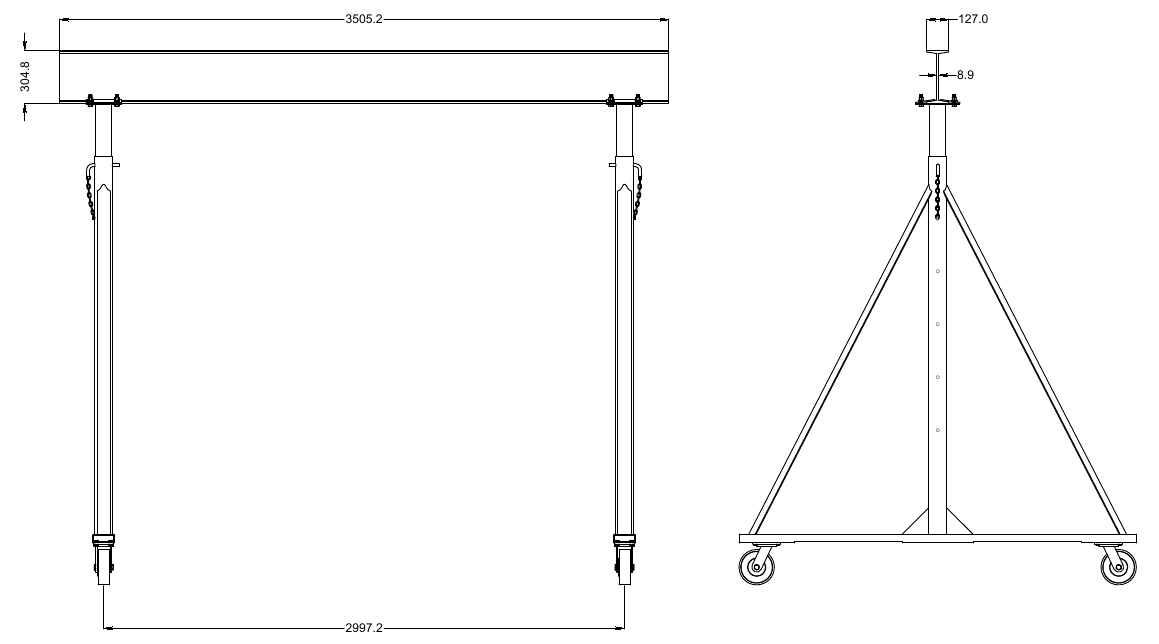

In [55]:
dados = pd.read_excel("viga_I.xlsx")

In [56]:
print(dados)

           secção   kg/m  Iy mm⁴ x10⁴  Wy mm³ x10³
0     S 75 x 8.5*    8.5          106         27.9
1    S 75 x 11.2*   11.2          123         32.3
2   S 100 x 11.5*   11.5          258         50.6
3   S 100 x 14.1*   14.1          286         56.1
4     S 130 x 15*   15.0          514         81.0
5   S 150 x 18.6*   18.6          921        121.0
6   S 150 x 25.7*   25.7         1096        144.0
7   S 200 x 27.4*   27.4         2407        237.0
8     S 200 x 34*   34.0         2708        267.0
9   S 250 x 37.8*   37.8         5164        407.0
10    S 250 x 52*   52.0         6166        486.0
11  S 310 x 47.3*   47.3         9142        599.0
12    S 310 x 52*   52.0         9610        630.0
13  S 310 x 60.7*   60.7        11400        747.0
14    S 310 x 74*   74.0        12750        836.0
15    S 380 x 64*   64.0        18730        983.0
16    S 380 x 74*   74.0        20270       1064.0
17  S 460 x 81.4*   81.4        33560       1469.0
18   S 460 x 104*  104.0       

In [57]:
viga=11 #numero da linha utilizada
Ix=(dados.iloc[viga,2])*10**4
Wx=(dados.iloc[viga,3])*10**3
peso=(dados.iloc[viga,1])*9.81 #N

### Reações de apoio

In [58]:
carga=carga*9.81 #N
RA=RB=(peso*v_livre+carga)/2
print ('A reação de apoio para ambas as extremidades com a carga ao centro da viga é de', RA, 'N') 

A reação de apoio para ambas as extremidades com a carga ao centro da viga é de 25221.0195 N


### Momento fletor e tensões na viga

In [59]:
x=np.linspace(0,v_livre,10000)
M_fletor=RA*(x-0)**1*(x>=0)-peso/2*(x-0)**2*(x>=0)-carga*(x-(v_livre/2))**1*(x>=(v_livre/2))+RB*(x-v_livre)**1*(x>=v_livre)

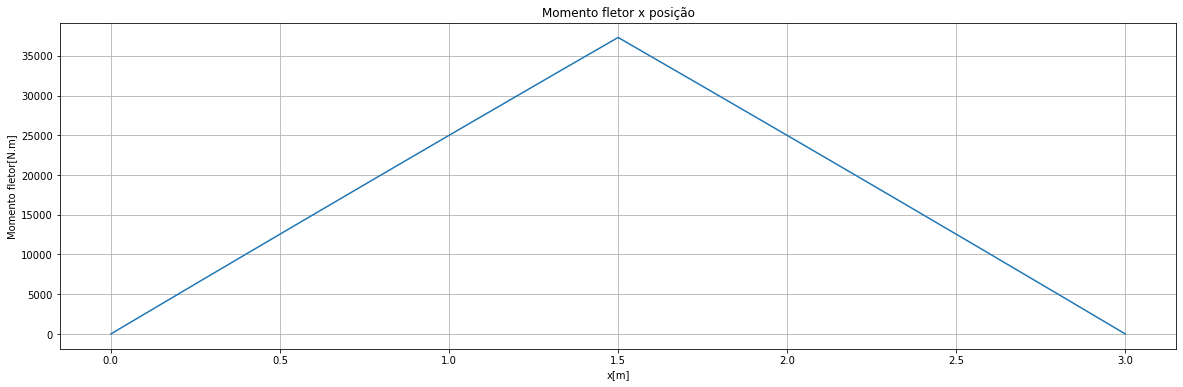

In [60]:
plt.figure(figsize=(20,6))
plt.grid()
plt.xlabel('x[m]')
plt.ylabel('Momento fletor[N.m]')
plt.title('Momento fletor x posição')
plt.plot(x,M_fletor)

In [61]:
momento_max=abs(np.max(M_fletor))
Wx=Wx/(1000**3) #conversão para m³
Ix=Ix/(1000**4) #conversão para m⁴
tensao=momento_max/Wx
cs=tens_escoam/tensao
print ('O maior momento ocorrido na viga é de ', momento_max, 'N.m', 'com uma tensão de ', tensao, 'N/m²', 'com um C.S de ', cs)

O maior momento ocorrido na viga é de  37305.83550186701 N.m com uma tensão de  62280192.82448582 N/m² com um C.S de  4.014117308604591


### Cálculo da deflexão máxima e verificação do critério de aceitação

In [62]:
y=(RA/6*(x-0)**3*(x>=0)-peso/24*(x-0)**4*(x>=0)-carga/6*(x-(v_livre/2))**3*(x>=(v_livre/2))+RB/6*(x-v_livre)**3*(x>=v_livre)+x*(-RA/6*v_livre**2+peso/24*v_livre**3+carga/6*(v_livre**2)/8))/(E*Ix)

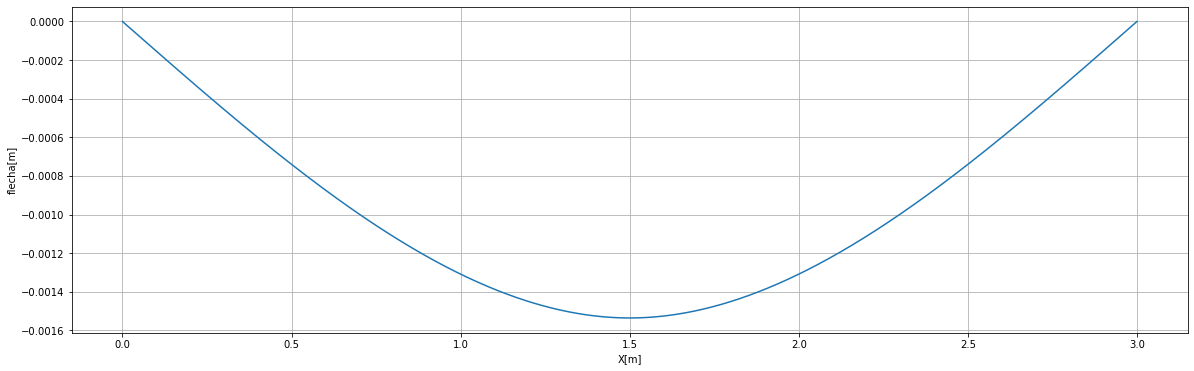

In [63]:
plt.figure(figsize=(20,6))
plt.xlabel('X[m]')
plt.ylabel('flecha[m]')
plt.grid()
plt.plot(x,y)

In [64]:
y_max=(abs(np.min(y)))*1000
print('A maior flecha possui o valor de ',y_max,'mm', 'e a flecha máxima permitida é de ', flecha_max_perm,'mm')

A maior flecha possui o valor de  1.5357697052688308 mm e a flecha máxima permitida é de  3.75 mm


In [65]:
if (y_max >= flecha_max_perm):
    print('Reveja os cálculos, flecha máxima ocorrida maior que a permissível')
else:
    print('Dimensionamento consistente com relação a flecha máxima permitida')

Dimensionamento consistente com relação a flecha máxima permitida
